# Hand Detection

In [1]:
import cv2
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sys
# Add the project root directory to the Python path
sys.path.append('../')

from src.utils import detector_utils as detector_utils
from src.utils.config import DATA_DIR


In [2]:
detection_graph, sess = detector_utils.load_inference_graph()
score_thresh=0.2
num_hands_detect = 2

def hand_detection(image_np, num_frames):
    im_height,im_width, channels = image_np.shape
    boxes = []
    scores = []
    boxes, scores = detector_utils.detect_objects(image_np,detection_graph, sess)
    # draw bounding boxes on frame
    detector_utils.draw_box_on_image(num_hands_detect, score_thresh,
                                             scores, boxes, im_width, im_height,
                                             image_np)
    # Calculate Frames per second (FPS)
    elapsed_time = (datetime.datetime.now() - start_time).total_seconds()
    fps = num_frames / elapsed_time

    # Display FPS on frame
    if (fps > 0):
        detector_utils.draw_fps_on_image("FPS : " + str(int(fps)),
                                                     image_np)

        img_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')  # Optional: Hides the axis ticks and labels
        plt.show()

====== loading HAND frozen graph into memory ======
+++++++++++++ Hand Inference graph loaded +++++++++++++


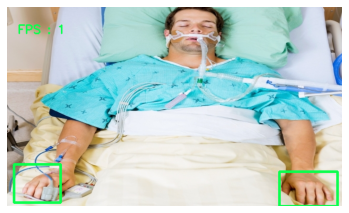

In [3]:
# for image
image_path = (DATA_DIR / 'demo_for_hand_detection.JPG').as_posix()
image_np = cv2.imread(image_path)
start_time = datetime.datetime.now()
hand_detection(image_np, 1)

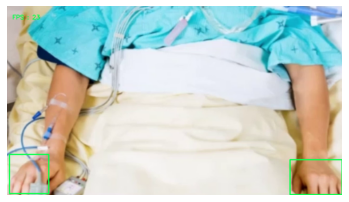

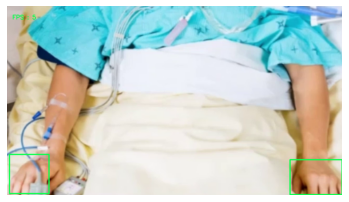

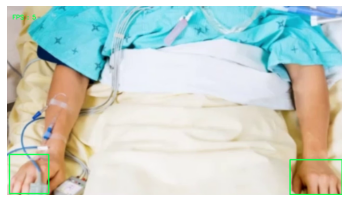

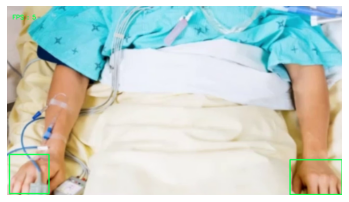

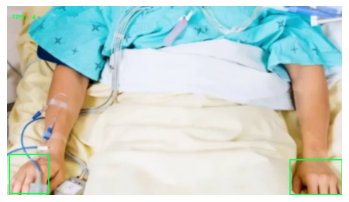

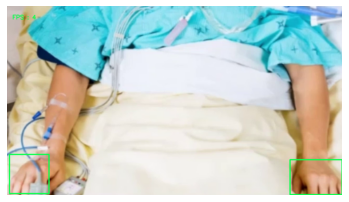

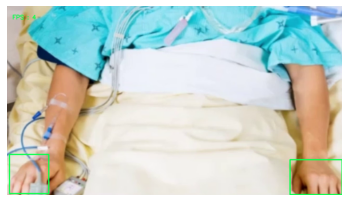

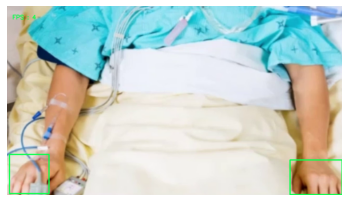

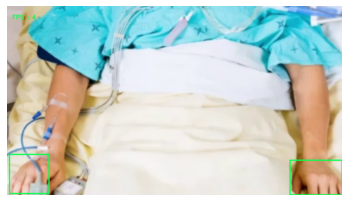

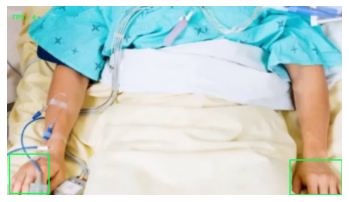

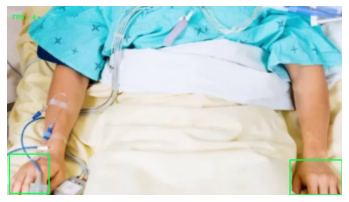

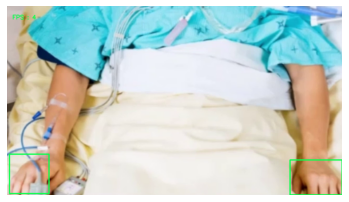

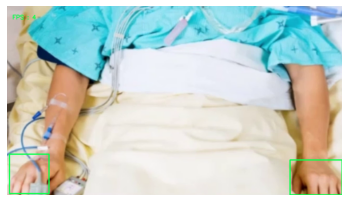

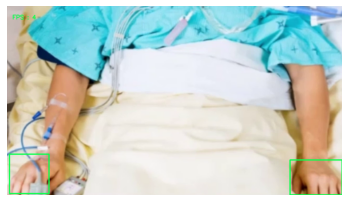

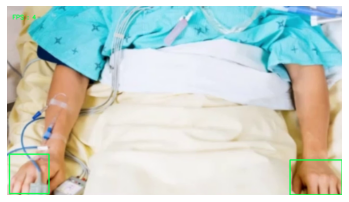

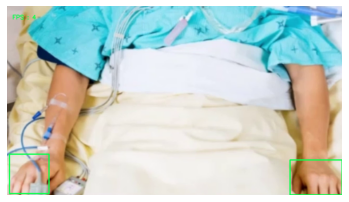

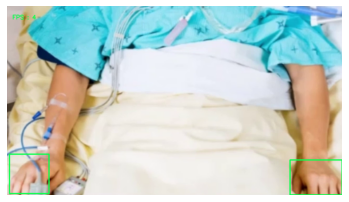

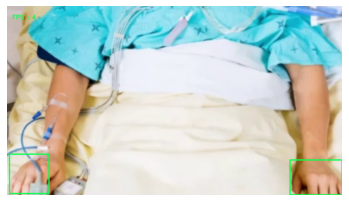

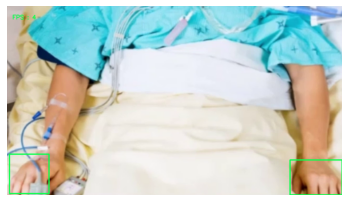

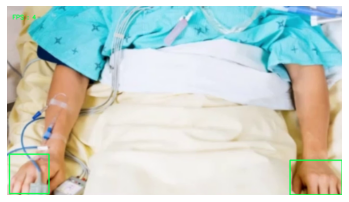

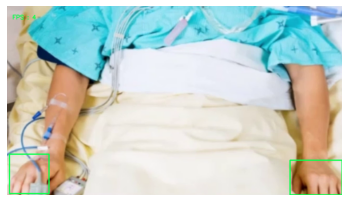

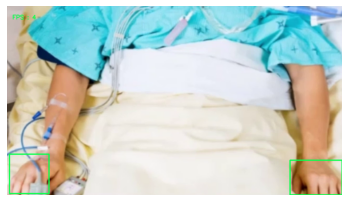

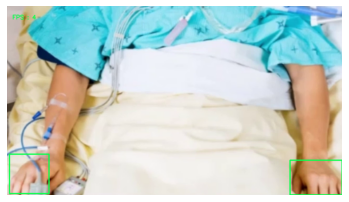

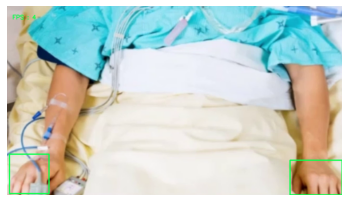

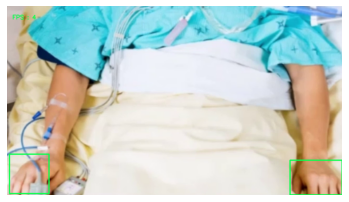

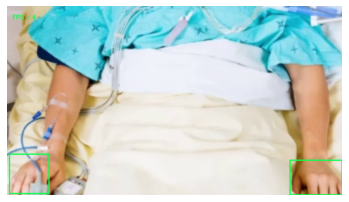

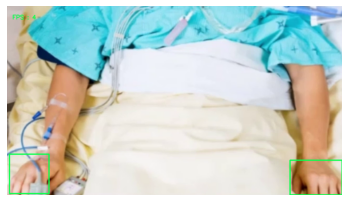

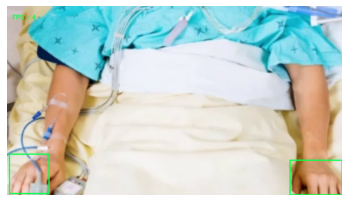

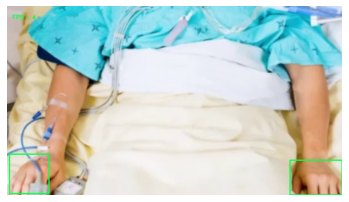

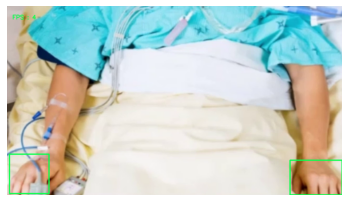

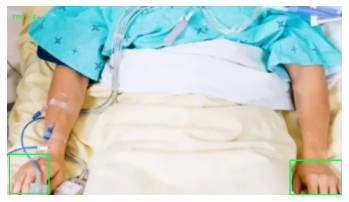

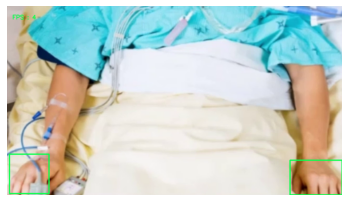

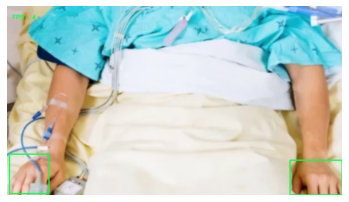

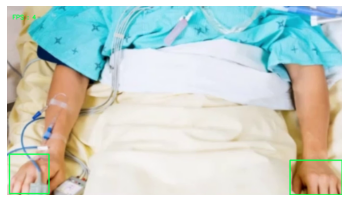

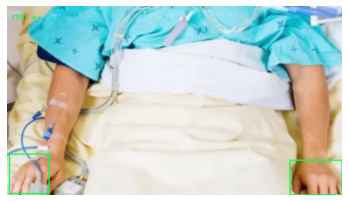

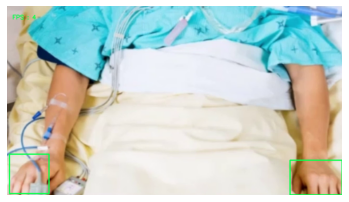

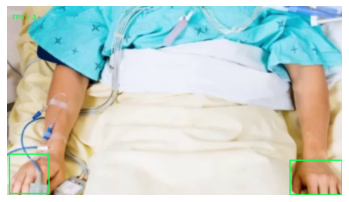

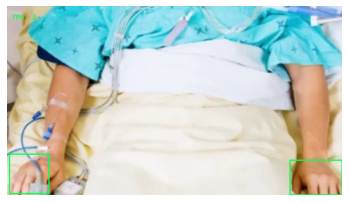

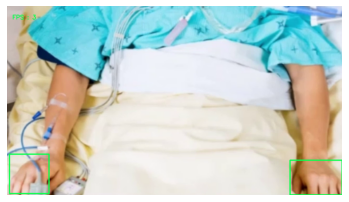

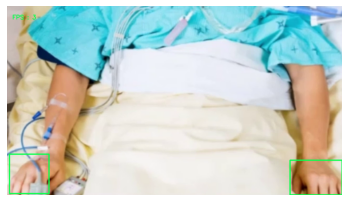

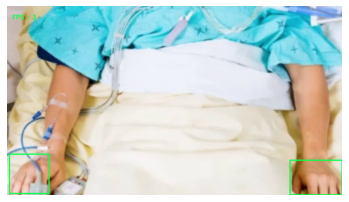

In [4]:
# for video
video_path = (DATA_DIR / 'hand_detection.mp4').as_posix()
cap = cv2.VideoCapture(video_path)
num_frames = 1
start_time = datetime.datetime.now()
while 1:
    ret, image_np = cap.read()
    if not ret:
        break
    num_frames += 1
    if num_frames > 50:
        break
    hand_detection(image_np, num_frames)

cap.release()